<a href="https://colab.research.google.com/github/jp-prud/IA-FUZZY/blob/main/Sistema_de_Fuzzy_IA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install scikit-fuzzy


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 9.7 MB/s eta 0:00:00


# **Definição do Problema**

Sugerir o valor de gorjeta para o garço com base na qualidade do serviço prestado e na qualidade da refeição

# **Variáveis**

**Entradas:**

1. **Qualidade da Refeição**
   - **Categorias:** ruim, média, boa  
   Refere-se à avaliação do cliente sobre a qualidade da comida servida. Essa variável é essencial, pois a qualidade da refeição impacta diretamente a satisfação do cliente e, consequentemente, a decisão sobre a gorjeta.

2. **Qualidade do Serviço**
   - **Categorias:** ruim, média, boa  
   Mede a experiência do cliente em relação ao atendimento recebido. Uma boa qualidade de serviço geralmente resulta em uma maior disposição para deixar uma gorjeta generosa.

---

**Saída:**

1. **Gorjeta Sugerida**
   - **Categorias:** baixa, média, alta  
   Representa o valor da gorjeta que o cliente deve considerar deixar, com base nas avaliações de qualidade da refeição e do serviço. Esse valor é crucial para reconhecer o trabalho do garçom e garantir um bom relacionamento.


In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

# Variáveis fuzzy
qualidade = ctrl.Antecedent(np.arange(0, 11, 1), 'qualidade')
servico = ctrl.Antecedent(np.arange(0, 11, 1), 'servico')
valor = ctrl.Antecedent(np.arange(25, 200, 1), 'valor')
gorjeta = ctrl.Consequent(np.arange(0, 80, 1), 'gorjeta')

# **Funções de Pertinência**

1. **Qualidade da Refeição**
   - **Ruim:** Avaliação muito baixa da qualidade da comida.
   - **Média:** Avaliação neutra em relação à qualidade da comida.
   - **Boa:** Avaliação muito alta da qualidade da comida.

2. **Qualidade do Serviço**
   - **Ruim:** Atendimento insatisfatório, com muitas falhas.
   - **Média:** Atendimento razoável, sem grandes problemas.
   - **Boa:** Atendimento excelente, com atenção e cordialidade.

3. **Valor da Conta**
   - **Muito Baixo:** Atendimento insatisfatório, com muitas falhas.
   - **Baixo:** Atendimento razoável, sem grandes problemas.
   - **Médio:** Atendimento excelente, com atenção e cordialidade.
   - **Alto:** Atendimento excelente, com atenção e cordialidade.
   - **Muito Alto:** Atendimento excelente, com atenção e cordialidade.

4. **Gorjeta Sugerida**
   - **Muito Baixa:** Valor sugerido de gorjeta muito baixo.
   - **Baixa:** Valor sugerido de gorjeta muito baixo.
   - **Média:** Valor sugerido de gorjeta razoável.
   - **Alta:** Valor sugerido de gorjeta generoso.
   - **Muito Alta:** Valor sugerido de gorjeta generoso.


In [ ]:
# Funções de pertinência da qualidade da refeição.
qualidade['ruim'] = fuzz.trimf(qualidade.universe, [0, 0, 4])
qualidade['media'] = fuzz.trimf(qualidade.universe, [3, 5, 7])
qualidade['boa'] = fuzz.trimf(qualidade.universe, [6, 10, 10])

# Funções de pertinência da qualidade do serviço
servico['ruim'] = fuzz.trimf(servico.universe, [0, 0, 4])
servico['media'] = fuzz.trimf(servico.universe, [3, 5, 7])
servico['boa'] = fuzz.trimf(servico.universe, [6, 10, 10])

# Funções de pertinência para o valor da conta
valor['muito baixo'] = fuzz.trimf(valor.universe, [25, 35, 50])
valor['baixo'] = fuzz.trimf(valor.universe, [45, 60, 75])
valor['medio'] = fuzz.trimf(valor.universe, [65, 80, 100])
valor['alto'] = fuzz.trimf(valor.universe, [90, 130, 150])
valor['muito alto'] = fuzz.trimf(valor.universe, [140, 170, 200])

# Funções de pertinência para gorjeta
gorjeta['muito baixa'] = fuzz.trimf(gorjeta.universe, [0, 0, 10])
gorjeta['baixa'] = fuzz.trimf(gorjeta.universe, [10, 15, 20])
gorjeta['media'] = fuzz.trimf(gorjeta.universe, [20, 30, 35])
gorjeta['alta'] = fuzz.trimf(gorjeta.universe, [35, 45, 55])
gorjeta['muito alta'] = fuzz.trimf(gorjeta.universe, [55, 65, 80])

# **Visualização dos Gráficos das Funções de Pertinência**

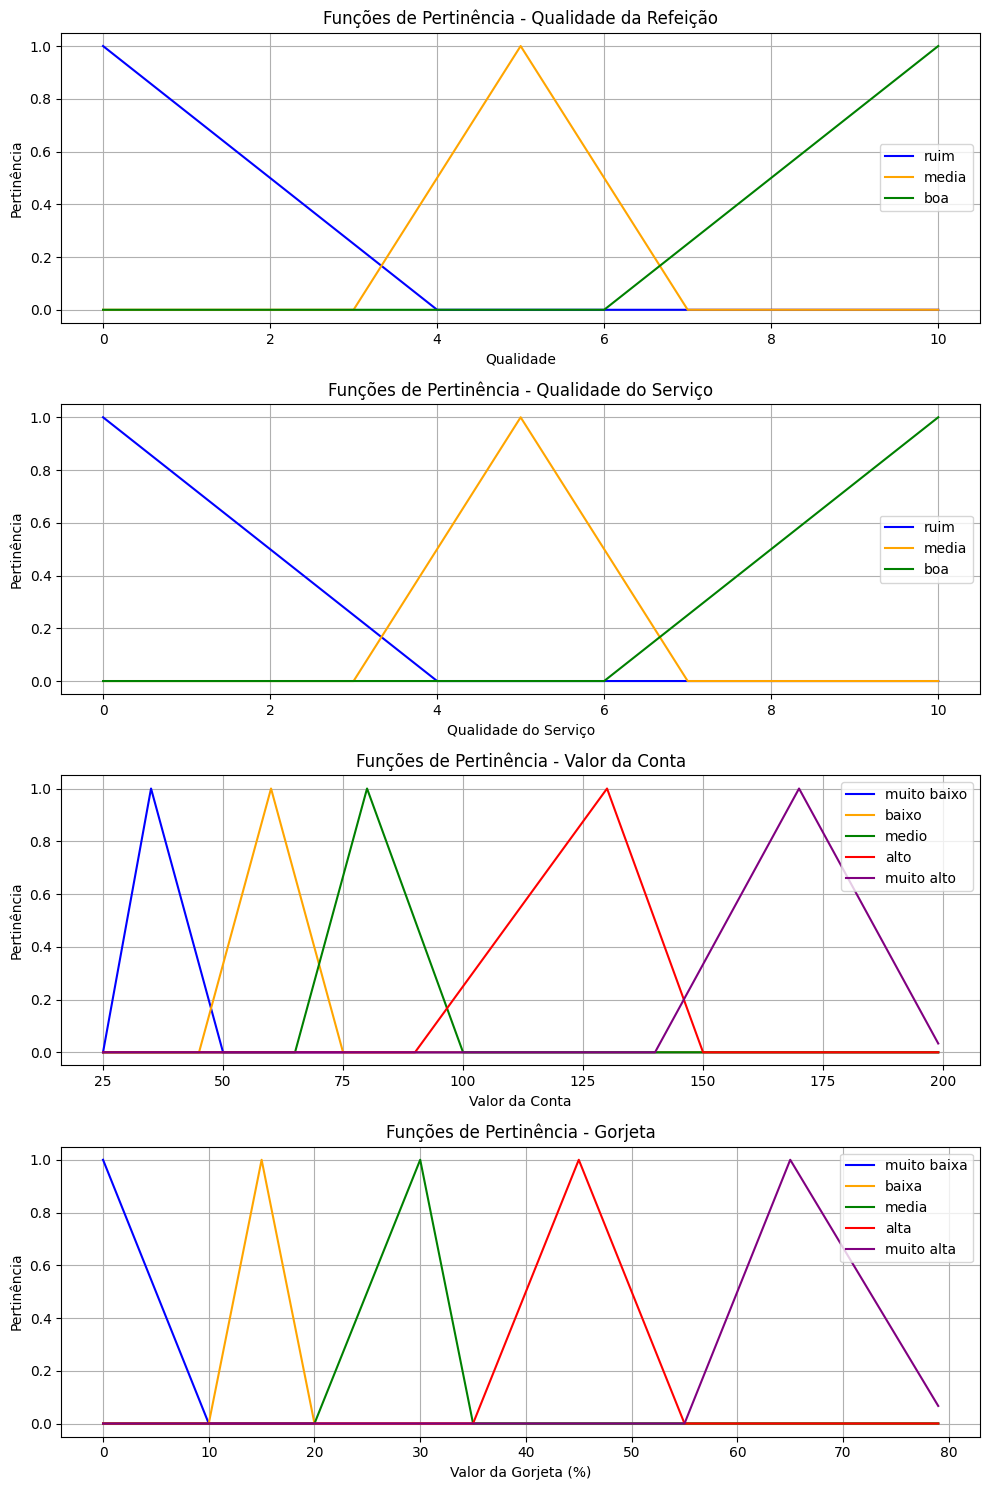

In [ ]:
# Gráficos das funções de pertinência
fig, axs = plt.subplots(4, 1, figsize=(10, 15))

# Função para plotar gráficos
def plotar_grafico(ax, x, y, titulo, xlabel, ylabel, legend):
    for label, color in legend:
        ax.plot(x, y[label].mf, label=label, color=color)
    ax.set_title(titulo)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    ax.legend()
    ax.grid()

# Gráficos
plotar_grafico(axs[0], qualidade.universe, qualidade, 'Funções de Pertinência - Qualidade da Refeição', 'Qualidade', 'Pertinência', [('ruim', 'blue'), ('media', 'orange'), ('boa', 'green')])
plotar_grafico(axs[1], servico.universe, servico, 'Funções de Pertinência - Qualidade do Serviço', 'Qualidade do Serviço', 'Pertinência', [('ruim', 'blue'), ('media', 'orange'), ('boa', 'green')])
plotar_grafico(axs[2], valor.universe, valor, 'Funções de Pertinência - Valor da Conta', 'Valor da Conta', 'Pertinência', [('muito baixo', 'blue'), ('baixo', 'orange'), ('medio', 'green'), ('alto', 'red'), ('muito alto', 'purple')])
plotar_grafico(axs[3], gorjeta.universe, gorjeta, 'Funções de Pertinência - Gorjeta', 'Valor da Gorjeta (%)', 'Pertinência', [('muito baixa', 'blue'), ('baixa', 'orange'), ('media', 'green'), ('alta', 'red'), ('muito alta', 'purple')])

plt.tight_layout()
plt.show()

# **Regras Fuzzy**

* Se a qualidade da refeição é ruim e a qualidade do serviço é ruim e o valor da conta é muito baixo, a gorjeta sugerida é muito baixa.
* Se a qualidade da refeição é ruim e a qualidade do serviço é ruim e o valor da conta é baixo, a gorjeta sugerida é baixa.
* Se a qualidade da refeição é ruim e a qualidade do serviço é ruim e o valor da conta é médio, a gorjeta sugerida é baixa.
* Se a qualidade da refeição é ruim e a qualidade do serviço é ruim e o valor da conta é alto, a gorjeta sugerida é média.
* Se a qualidade da refeição é ruim e a qualidade do serviço é ruim e o valor da conta é muito alto, a gorjeta sugerida é média.

* Se a qualidade da refeição é média e a qualidade do serviço é média, a gorjeta sugerida é média.
* Se a qualidade da refeição é boa e a qualidade do serviço é boa, a gorjeta sugerida é alta.
* Se a qualidade da refeição é ruim e a qualidade do serviço é boa, a gorjeta sugerida é média.
* Se a qualidade da refeição é boa e a qualidade do serviço é ruim, a gorjeta sugerida é média.
* Se a qualidade da refeição é média e a qualidade do serviço é ruim, a gorjeta sugerida é baixa.

* Se a qualidade da refeição é boa e a qualidade do serviço é média, a gorjeta sugerida é alta.
* Se a qualidade da refeição é média e a qualidade do serviço é boa, a gorjeta sugerida é alta.

* Se a qualidade da refeição é média e a qualidade do serviço é ruim e o valor da conta é muito baixo, a gorjeta sugerida é baixa.
* Se a qualidade da refeição é média e a qualidade do serviço é ruim e o valor da conta é baixo, a gorjeta sugerida é baixa.
* Se a qualidade da refeição é média e a qualidade do serviço é ruim e o valor da conta é médio, a gorjeta sugerida é baixa.
* Se a qualidade da refeição é média e a qualidade do serviço é ruim e o valor da conta é alto, a gorjeta sugerida é média.
* Se a qualidade da refeição é média e a qualidade do serviço é ruim e o valor da conta é muito alto, a gorjeta sugerida é média.

* Se a qualidade da refeição é boa e a qualidade do serviço é boa e o valor da conta é muito baixo, a gorjeta sugerida é média.
* Se a qualidade da refeição é boa e a qualidade do serviço é boa e o valor da conta é baixo, a gorjeta sugerida é alta.
* Se a qualidade da refeição é boa e a qualidade do serviço é boa e o valor da conta é médio, a gorjeta sugerida é alta.
* Se a qualidade da refeição é boa e a qualidade do serviço é boa e o valor da conta é alto, a gorjeta sugerida é muito alta.
* Se a qualidade da refeição é boa e a qualidade do serviço é boa e o valor da conta é muito alto, a gorjeta sugerida é muito alta.

* Se a qualidade da refeição é ruim e a qualidade do serviço é boa e o valor da conta é muito baixo, a gorjeta sugerida é baixa.
* Se a qualidade da refeição é ruim e a qualidade do serviço é boa e o valor da conta é baixo, a gorjeta sugerida é média.
* Se a qualidade da refeição é ruim e a qualidade do serviço é boa e o valor da conta é médio, a gorjeta sugerida é média.
* Se a qualidade da refeição é ruim e a qualidade do serviço é boa e o valor da conta é alto, a gorjeta sugerida é alta.
* Se a qualidade da refeição é ruim e a qualidade do serviço é boa e o valor da conta é muito alto, a gorjeta sugerida é alta.

* Se a qualidade da refeição é boa e a qualidade do serviço é ruim e o valor da conta é muito baixo, a gorjeta sugerida é média.
* Se a qualidade da refeição é boa e a qualidade do serviço é ruim e o valor da conta é baixo, a gorjeta sugerida é média.
* Se a qualidade da refeição é boa e a qualidade do serviço é ruim e o valor da conta é médio, a gorjeta sugerida é alta.
* Se a qualidade da refeição é boa e a qualidade do serviço é ruim e o valor da conta é alto, a gorjeta sugerida é alta.
* Se a qualidade da refeição é boa e a qualidade do serviço é ruim e o valor da conta é muito alto, a gorjeta sugerida é alta.



In [ ]:
# Regras fuzzy

regra1 = ctrl.Rule(qualidade['ruim'] & servico['ruim'] & valor['muito baixo'], gorjeta['muito baixa'])
regra2 = ctrl.Rule(qualidade['ruim'] & servico['ruim'] & valor['baixo'], gorjeta['baixa'])
regra3 = ctrl.Rule(qualidade['ruim'] & servico['ruim'] & valor['medio'], gorjeta['baixa'])
regra4 = ctrl.Rule(qualidade['ruim'] & servico['ruim'] & valor['alto'], gorjeta['media'])
regra5 = ctrl.Rule(qualidade['ruim'] & servico['ruim'] & valor['muito alto'], gorjeta['media'])

regra6 = ctrl.Rule(qualidade['media'] & servico['media'], gorjeta['media'])
regra7 = ctrl.Rule(qualidade['boa'] & servico['boa'], gorjeta['alta'])
regra8 = ctrl.Rule(qualidade['ruim'] & servico['boa'], gorjeta['media'])
regra9 = ctrl.Rule(qualidade['boa'] & servico['ruim'], gorjeta['media'])
regra10 = ctrl.Rule(qualidade['media'] & servico['ruim'], gorjeta['baixa'])

regra11 = ctrl.Rule(qualidade['boa'] & servico['media'], gorjeta['alta'])
regra12 = ctrl.Rule(qualidade['media'] & servico['boa'], gorjeta['alta'])

regra13 = ctrl.Rule(qualidade['media'] & servico['ruim'] & valor['muito baixo'], gorjeta['baixa'])
regra14 = ctrl.Rule(qualidade['media'] & servico['ruim'] & valor['baixo'], gorjeta['baixa'])
regra15 = ctrl.Rule(qualidade['media'] & servico['ruim'] & valor['medio'], gorjeta['baixa'])
regra16 = ctrl.Rule(qualidade['media'] & servico['ruim'] & valor['alto'], gorjeta['media'])
regra17 = ctrl.Rule(qualidade['media'] & servico['ruim'] & valor['muito alto'], gorjeta['media'])

regra18 = ctrl.Rule(qualidade['boa'] & servico['boa'] & valor['muito baixo'], gorjeta['media'])
regra19 = ctrl.Rule(qualidade['boa'] & servico['boa'] & valor['baixo'], gorjeta['alta'])
regra20 = ctrl.Rule(qualidade['boa'] & servico['boa'] & valor['medio'], gorjeta['alta'])
regra21 = ctrl.Rule(qualidade['boa'] & servico['boa'] & valor['alto'], gorjeta['muito alta'])
regra22 = ctrl.Rule(qualidade['boa'] & servico['boa'] & valor['muito alto'], gorjeta['muito alta'])

regra23 = ctrl.Rule(qualidade['ruim'] & servico['boa'] & valor['muito baixo'], gorjeta['baixa'])
regra24 = ctrl.Rule(qualidade['ruim'] & servico['boa'] & valor['baixo'], gorjeta['media'])
regra25 = ctrl.Rule(qualidade['ruim'] & servico['boa'] & valor['medio'], gorjeta['media'])
regra26 = ctrl.Rule(qualidade['ruim'] & servico['boa'] & valor['alto'], gorjeta['alta'])
regra27 = ctrl.Rule(qualidade['ruim'] & servico['boa'] & valor['muito alto'], gorjeta['alta'])

regra28 = ctrl.Rule(qualidade['boa'] & servico['ruim'] & valor['muito baixo'], gorjeta['media'])
regra29 = ctrl.Rule(qualidade['boa'] & servico['ruim'] & valor['baixo'], gorjeta['media'])
regra30 = ctrl.Rule(qualidade['boa'] & servico['ruim'] & valor['medio'], gorjeta['alta'])
regra31 = ctrl.Rule(qualidade['boa'] & servico['ruim'] & valor['alto'], gorjeta['alta'])
regra32 = ctrl.Rule(qualidade['boa'] & servico['ruim'] & valor['muito alto'], gorjeta['alta'])

regras = [regra1, regra2, regra3, regra4, regra5,
          regra6, regra7, regra8, regra9, regra10,
          regra11, regra12, regra13, regra14, regra15,
          regra16, regra17, regra18, regra19, regra20,
          regra21, regra22, regra23, regra24, regra25,
          regra26, regra27, regra28, regra29, regra30,
          regra31, regra32]

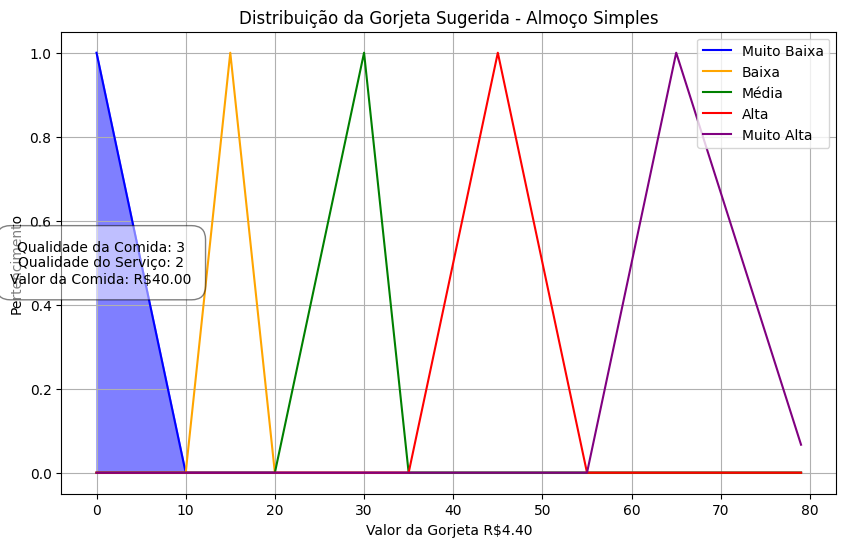

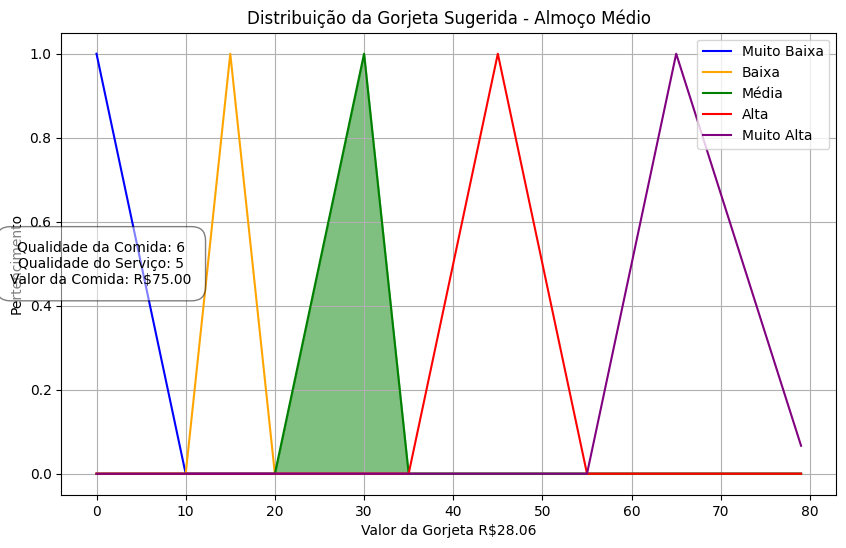

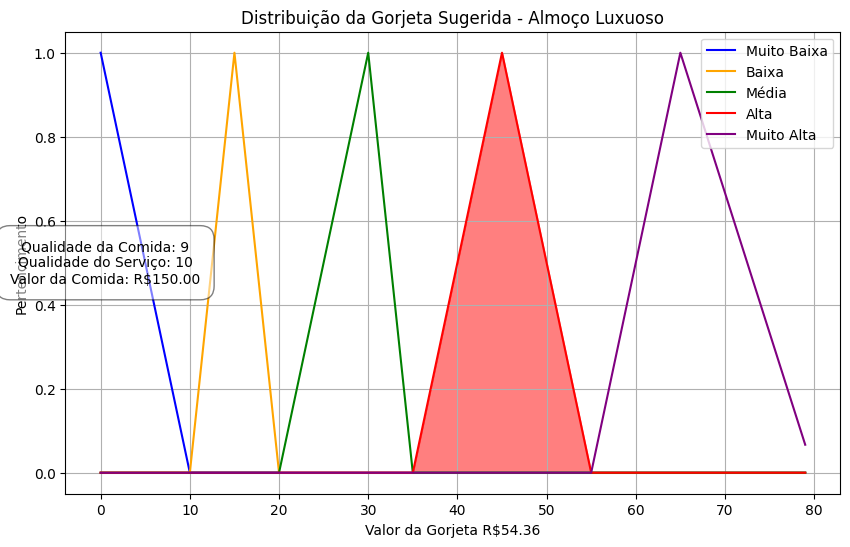

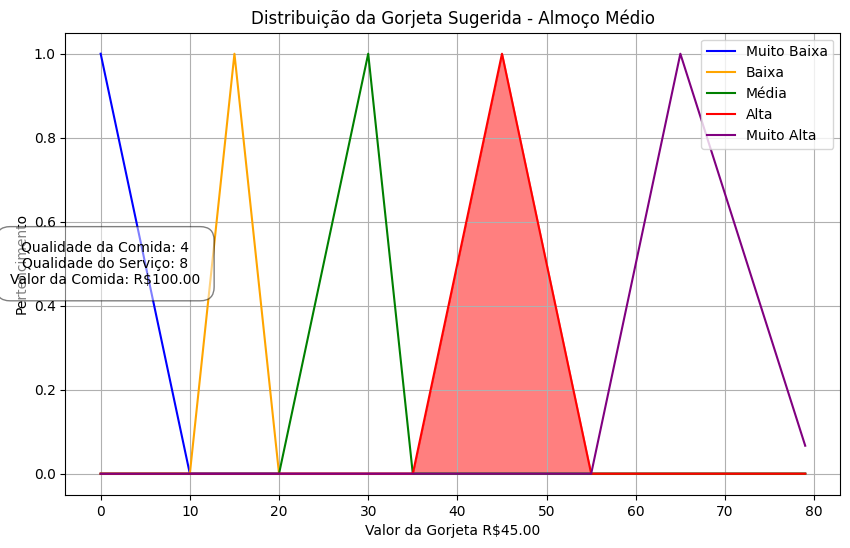

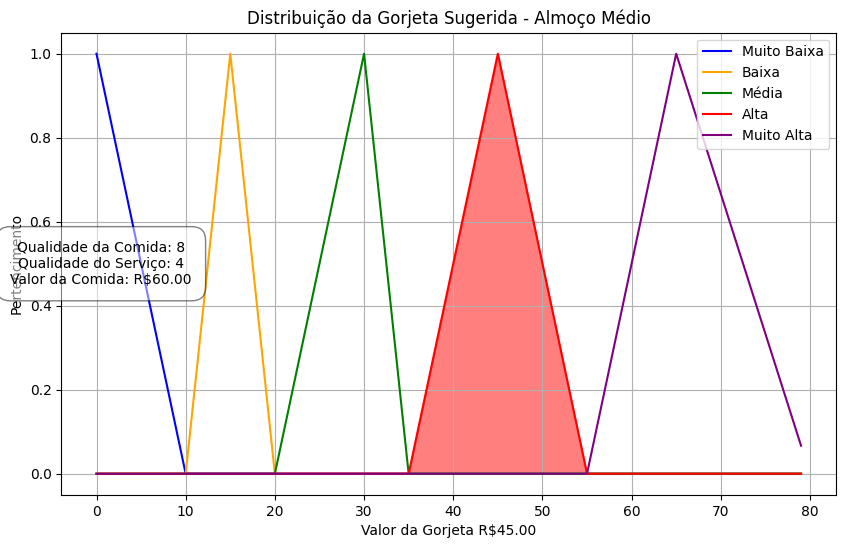

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import skfuzzy as fuzz
from skfuzzy import control as ctrl

# Criando o sistema de controle
sistema_gorjeta = ctrl.ControlSystem(regras)
simulacao_gorjeta = ctrl.ControlSystemSimulation(sistema_gorjeta)

sistema_gorjeta = ctrl.ControlSystem(regras)
simulacao_gorjeta = ctrl.ControlSystemSimulation(sistema_gorjeta)

# Array com várias entradas
entradas = [
    {'qualidade': 3, 'servico': 2, 'valor': 40},  # Almoço simples
    {'qualidade': 6, 'servico': 5, 'valor': 75},  # Almoço médio
    {'qualidade': 9, 'servico': 10, 'valor': 150}, # Almoço luxuoso
    {'qualidade': 4, 'servico': 8, 'valor': 100},  # Almoço médio
    {'qualidade': 8, 'servico': 4, 'valor': 60},   # Almoço simples
]

# Iterando sobre as entradas para gerar gráficos
for entrada in entradas:
    qualidade_input = entrada['qualidade']
    servico_input = entrada['servico']
    valor_input = entrada['valor']

    # Determinando o tipo do almoço
    if valor_input <= 50:
        tipo_almoço = "Almoço Simples"
    elif valor_input <= 100:
        tipo_almoço = "Almoço Médio"
    else:
        tipo_almoço = "Almoço Luxuoso"

    # Validação da entrada
    if 0 <= qualidade_input <= 10 and 0 <= servico_input <= 10 and 25 <= valor_input <= 200:
        simulacao_gorjeta.input['qualidade'] = qualidade_input
        simulacao_gorjeta.input['servico'] = servico_input
        simulacao_gorjeta.input['valor'] = valor_input

        # Computando o resultado
        simulacao_gorjeta.compute()
        gorjeta_sugerida = simulacao_gorjeta.output['gorjeta']

        # Configurando o gráfico
        plt.figure(figsize=(10, 6))

        # Plotando todas as funções de pertencimento
        plt.plot(gorjeta.universe, gorjeta['muito baixa'].mf, label='Muito Baixa', color='blue')
        plt.plot(gorjeta.universe, gorjeta['baixa'].mf, label='Baixa', color='orange')
        plt.plot(gorjeta.universe, gorjeta['media'].mf, label='Média', color='green')
        plt.plot(gorjeta.universe, gorjeta['alta'].mf, label='Alta', color='red')
        plt.plot(gorjeta.universe, gorjeta['muito alta'].mf, label='Muito Alta', color='purple')

        # Pintando apenas a região correspondente à gorjeta sugerida
        if gorjeta_sugerida <= 10:
            plt.fill_between(gorjeta.universe, 0, gorjeta['muito baixa'].mf, color='blue', alpha=0.5)
        elif gorjeta_sugerida <= 20:
            plt.fill_between(gorjeta.universe, 0, gorjeta['baixa'].mf, color='orange', alpha=0.5)
        elif gorjeta_sugerida <= 35:
            plt.fill_between(gorjeta.universe, 0, gorjeta['media'].mf, color='green', alpha=0.5)
        elif gorjeta_sugerida <= 55:
            plt.fill_between(gorjeta.universe, 0, gorjeta['alta'].mf, color='red', alpha=0.5)
        else:
            plt.fill_between(gorjeta.universe, 0, gorjeta['muito alta'].mf, color='purple', alpha=0.5)

        # Exibindo informações no gráfico
        plt.title(f"Distribuição da Gorjeta Sugerida - {tipo_almoço}")
        plt.xlabel(f"Valor da Gorjeta R${gorjeta_sugerida:.2f}")
        plt.ylabel("Pertencimento")
        plt.legend()
        plt.grid()

        # Adicionando descrição das entradas
        descricao = (f"Qualidade da Comida: {qualidade_input}\n"
                     f"Qualidade do Serviço: {servico_input}\n"
                     f"Valor da Comida: R${valor_input:.2f}")
        plt.text(0.5, 0.5, descricao, ha='center', va='center', fontsize=10,
                 bbox=dict(facecolor='white', alpha=0.5, boxstyle='round,pad=1'))

        # Mostrando o gráfico
        plt.show()
    else:
        print("Por favor, insira valores válidos: qualidade e serviço entre 0 e 10, e valor entre 25 e 200.")